In [1]:
#导入包 设置字体
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
%matplotlib inline

In [6]:
#读取excel文件
df = pd.read_csv('jybb.csv',encoding='gbk')

#进行简单的数据清理
#对时间进行数据处理 转换为datatime类型
df['Time'] = pd.to_datetime(df['StrTime'])

#去除无关列如Status Remark等
df = df.drop(['Status','Remark','NickName','Sender'],axis=1)

#将1和0名称转为昵称
df.loc[df['IsSender'] == '1','IsSender'] = 'zmj'
df.loc[df['IsSender'] == '0','IsSender'] = 'zjy'
# df['IsSender'] = np.where(df['IsSender']=='1','zmj','zjy')
# df['IsSender'].mask(df['IsSender'] == '1','zmj',inplace=True)

df.describe()

,localId,TalkerId,Type,SubType,CreateTime
count,282820.000000,282820.000000,282820.000000,282820.000000,2.828200e+05
mean,295288.640361,4.394717,33.143377,0.272247,1.678543e+09
std,195203.871153,4.551453,525.575119,7.380425,1.185879e+07
min,1.000000,1.000000,1.000000,0.000000,1.659613e+09
25%,118785.750000,1.000000,1.000000,0.000000,1.668529e+09
50%,306465.500000,1.000000,1.000000,0.000000,1.675793e+09
75%,443422.250000,11.000000,1.000000,0.000000,1.687935e+09
max,615474.000000,11.000000,11000.000000,2000.000000,1.707579e+09


Text(0.5, 1.0, '一天之中聊天小时变化')

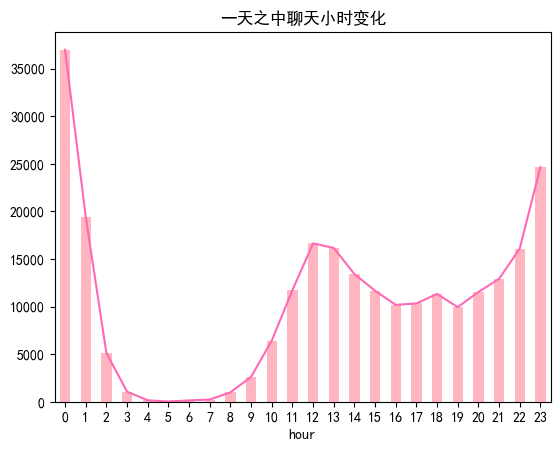

In [71]:
#统计一天之内聊天小时变化

#设置新的一列 代表小时积累
df['hourcount'] = 1

#将时间划分为小时 以小时分组计算
df['hour'] = df['Time'].map(lambda x:x.hour)
group_by_hour = df.groupby(by='hour').count()['hourcount']

#画条形图和折线图组合
group_by_hour.plot(kind='bar',color='lightpink')
group_by_hour.plot(kind='line',color='hotpink')
plt.title('一天之中聊天小时变化')

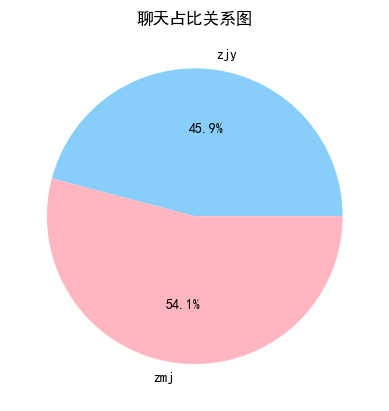

In [232]:
#绘制聊天占比图

#信息数量积累
df['msgcount'] = 1

#以id昵称分组
group_by_id = df.groupby(by='IsSender').count()['msgcount']

#绘制饼图并保存
plt.pie(group_by_id,labels=['zjy','zmj'],autopct='%1.1f%%',colors=['lightskyblue','lightpink'])
plt.title('聊天占比关系图')
plt.savefig(f'chat', dpi=500)

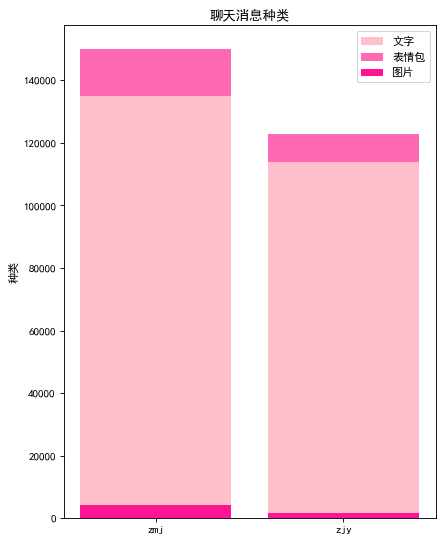

<Figure size 640x480 with 0 Axes>

In [231]:
#绘制聊天消息种类
type_counts_0 = df[df['IsSender'] == 'zjy']['Type']
type_counts_0.value_counts()

labels = ['zmj','zjy']
text = [134819,114021]
meme = [15213,8817]
picture = [4215,1532]
width = 0.8
fig,ax = plt.subplots(figsize=(6,8),dpi=80)
ax.bar(labels,text,width,label='文字',color='pink')
ax.bar(labels,meme,width,bottom=text,label='表情包',color='hotpink')
ax.bar(labels,picture,width,label='图片',color='deeppink')
ax.set_ylabel('种类')
ax.set_title('聊天消息种类')
ax.legend()
plt.show()
plt.savefig(f'typecount', dpi=500)

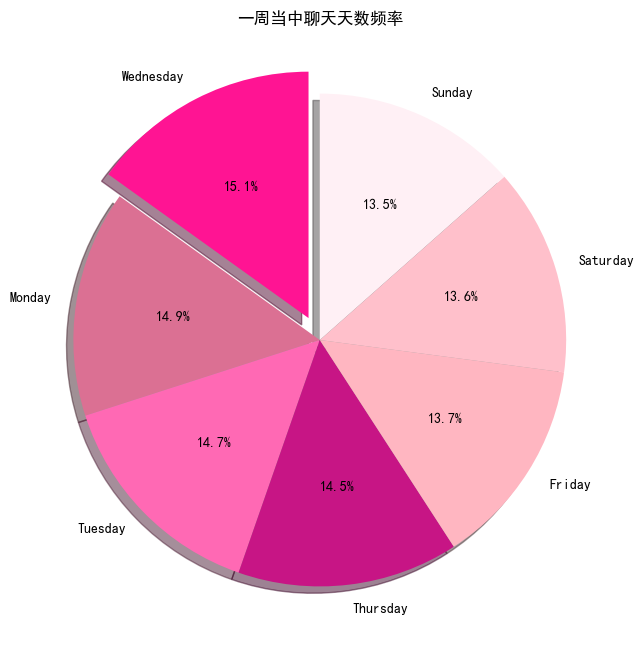

<Figure size 640x480 with 0 Axes>

In [230]:
weekdays = df['Time'].dt.day_name()
weekday_counts = weekdays.value_counts()

colors = ['deeppink','palevioletred','hotpink','mediumvioletred','lightpink','pink','lavenderblush']
explode = (0.1,0,0,0,0,0,0)
plt.figure(figsize=(8,8))
plt.pie(weekday_counts,explode=explode,labels=weekday_counts.index,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('一周当中聊天天数频率')
plt.show()
plt.savefig(f'weekfre', dpi=500)

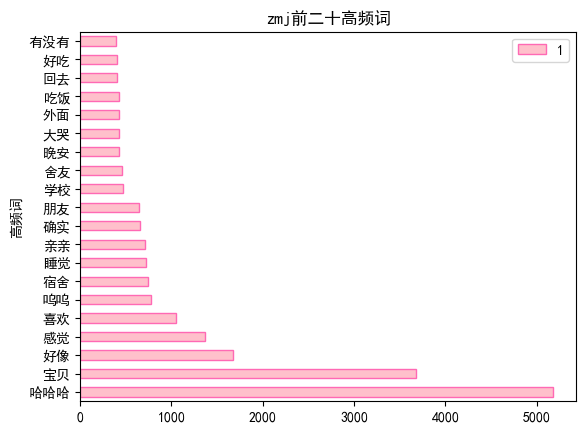

In [229]:
from pandas.core.frame import DataFrame

content_1 = df[(df['Type'] == 1)&(df['IsSender'] == 'zmj')]['StrContent']
output_file_path_1 = r"C:\Users\25962\datajy\content_1.txt"
content_1.to_csv(output_file_path_1,index=False,header=False,sep='\t')

with open(r"C:\Users\25962\datajy\content_1.txt","r",encoding='utf-8') as file:
    text = file.read()
 
import re
import jieba

cleaned_text = re.sub(r'[^\u4e00-\u9fa5]','',text)
words = jieba.cut(cleaned_text)

stop_words = set()
with open(r"C:\Users\25962\datajy\stopwords_cn.txt","r",encoding='utf-8') as stop_words_file:
    stop_words = set(stop_words_file.read().splitlines())
filtered_words = [word for word in words if word not in stop_words and len(word)>1]

from collections import Counter
word_freq_zmj = Counter(filtered_words)
most_common_words=word_freq_zmj.most_common(20)
most_common_words_df = DataFrame(most_common_words)

most_common_words_df

most_common_words_df.set_index(0).plot(kind='barh',color='pink',edgecolor='hotpink')
plt.title('zmj前二十高频词')
plt.ylabel('高频词')
plt.savefig(f'frewordzmj', dpi=500)

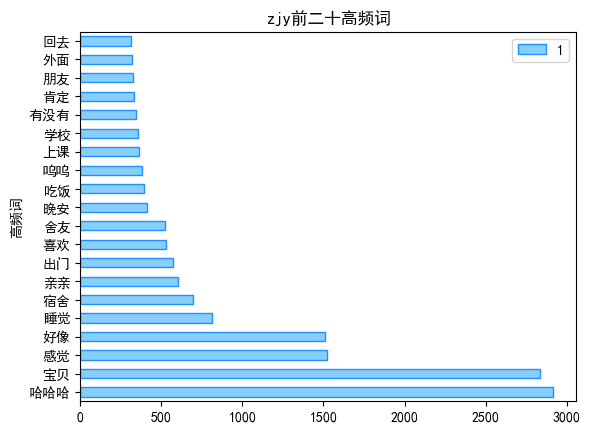

In [228]:
content_0 = df[(df['Type'] == 1)&(df['IsSender'] == 'zjy')]['StrContent']
output_file_path_0 = r"C:\Users\25962\datajy\content_0.txt"
content_0.to_csv(output_file_path_0,index=False,header=False,sep='\t')

with open(r"C:\Users\25962\datajy\content_0.txt","r",encoding='utf-8') as file:
    text = file.read()
 
import re
import jieba

cleaned_text = re.sub(r'[^\u4e00-\u9fa5]','',text)
words = jieba.cut(cleaned_text)

stop_words = set()
with open(r"C:\Users\25962\datajy\stopwords_cn.txt","r",encoding='utf-8') as stop_words_file:
    stop_words = set(stop_words_file.read().splitlines())
filtered_words = [word for word in words if word not in stop_words and len(word)>1]

from collections import Counter
word_freq_zjy = Counter(filtered_words)
most_common_words0 = word_freq_zjy.most_common(20)

most_common_words0_df = DataFrame(most_common_words0)

most_common_words0_df

most_common_words0_df.set_index(0).plot(kind='barh',color='lightskyblue',edgecolor='dodgerblue')
plt.title('zjy前二十高频词')
plt.ylabel('高频词')
plt.savefig(f'frewordzjy', dpi=500)

In [ ]:
Meme1 = df[(df['Type'] == 3)&(df['IsSender'] == 1)]['StrContent']
Meme_1_counts = Meme1.value_counts()
Meme_1_counts

In [47]:
df

,localId,TalkerId,Type,SubType,IsSender,CreateTime,StrContent,StrTime,Time,hourcount,hour,hourcount1,hour1
0,561187,1,1,0,0,1659612582,我通过了你的朋友验证请求，现在我们可以开始聊天了,2022/8/4 19:29,2022-08-04 19:29:00,1,19,1,19
1,561188,1,1,0,0,1659612607,哈咯,2022/8/4 19:30,2022-08-04 19:30:00,1,19,1,19
2,561189,1,1,0,0,1659612619,发一下录取界面我确认一下专业哦,2022/8/4 19:30,2022-08-04 19:30:00,1,19,1,19
3,561190,1,1,0,1,1659613357,好的,2022/8/4 19:42,2022-08-04 19:42:00,1,19,1,19
4,561191,1,3,0,1,1659613369,"<msg><img hdlength=""0"" length=""25886"" hevc_mid...",2022/8/4 19:42,2022-08-04 19:42:00,1,19,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282815,561179,6,1,0,0,1707578600,怎么说,2024/2/10 23:23,2024-02-10 23:23:00,1,23,1,23
282816,561181,6,1,0,1,1707578606,是不是有想过拍照的,2024/2/10 23:23,2024-02-10 23:23:00,1,23,1,23
282817,561182,6,47,0,1,1707578608,"<msg><emoji fromusername = ""wxid_c8aq7i938kh22...",2024/2/10 23:23,2024-02-10 23:23:00,1,23,1,23
282818,561183,6,1,0,0,1707578608,我只能说有点说法,2024/2/10 23:23,2024-02-10 23:23:00,1,23,1,23


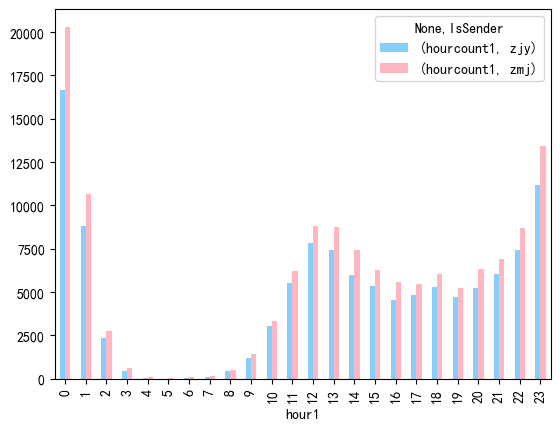

In [227]:
# df['hourcount'] = 1
# df['hour'] = df['Time'].map(lambda x:x.hour)
# group_by_hour = df.groupby(by='hour').count()['hourcount']
# group_by_hour.plot(kind='bar',color='lightpink')
# group_by_hour.plot(kind='line',color='hotpink')
# plt.title('一天之中聊天小时变化')


df['hourcount1'] = 1
df['hour1'] = df['Time'].map(lambda x:x.hour)
group_by_hour1 = df.groupby(['hour1','IsSender']).count()['hourcount1']
group_by_hour1 = group_by_hour1.to_frame()
group_by_hour1.unstack().plot(kind='bar',color=['lightskyblue','lightpink'])
plt.savefig(f'alldailytrend', dpi=500)

In [16]:
import pandas as pd
import jieba
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
import numpy as np

df = df[df['StrContent'].apply(lambda x: isinstance(x, str))]
df = df[~df['StrContent'].str.contains('<msg>')]

df['StrTime'] = pd.to_datetime(df['StrTime'])
df['month'] = df['StrTime'].dt.month



In [17]:
df['sentiment'] = df['StrContent'].apply(lambda x: SnowNLP(x).sentiments)

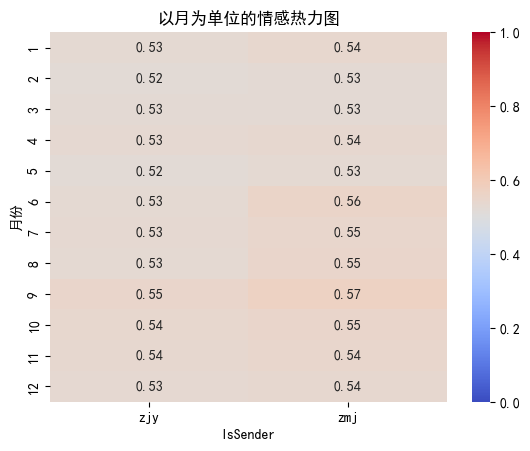

<Figure size 640x480 with 0 Axes>

In [233]:
avg_sentiment = df.groupby(['IsSender', 'month'])['sentiment'].mean().reset_index()

heatmap_data = avg_sentiment.pivot('month', 'IsSender', 'sentiment')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', vmin=0, vmax=1)

plt.ylabel('月份')
plt.title('以月为单位的情感热力图')
plt.show()
plt.savefig(f'heatmapmood2', dpi=1000)

C:\Users\25962\AppData\Local\Temp\ipykernel_3420\2385763597.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user1_monthly_sentiment_predicted = user1_monthly_sentiment.append(prediction_user1_monthly)
C:\Users\25962\AppData\Local\Temp\ipykernel_3420\2385763597.py:36: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user2_monthly_sentiment_predicted = user2_monthly_sentiment.append(prediction_user2_monthly)


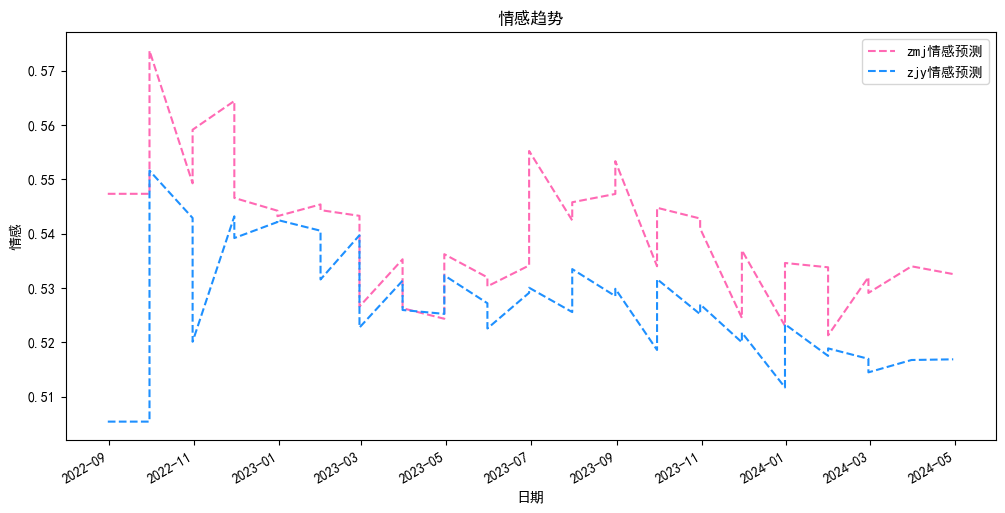

<Figure size 640x480 with 0 Axes>

In [225]:
import pandas as pd
from snownlp import SnowNLP
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import re



# 将数据按用户分开
user1_df = df[df['IsSender'] == 'zmj']
user2_df = df[df['IsSender'] == 'zjy']

# 设置索引为时间列
user1_df.set_index('Time', inplace=True)
user2_df.set_index('Time', inplace=True)

# 按天分组并计算平均情感值
user1_daily_sentiment = user1_df['sentiment'].resample('D').mean()
user2_daily_sentiment = user2_df['sentiment'].resample('D').mean()

# 按月分组并计算平均情感值
user1_monthly_sentiment = user1_df['sentiment'].resample('M').mean()
user2_monthly_sentiment = user2_df['sentiment'].resample('M').mean()

# 使用ARIMA模型进行情感趋势预测（按月）
model_user1_monthly = ARIMA(user1_monthly_sentiment, order=(1, 1, 1))
model_user2_monthly = ARIMA(user2_monthly_sentiment, order=(1, 1, 1))
model_fit_user1_monthly = model_user1_monthly.fit()
model_fit_user2_monthly = model_user2_monthly.fit()
prediction_user1_monthly = model_fit_user1_monthly.predict(start=1, end=20)
prediction_user2_monthly = model_fit_user2_monthly.predict(start=1, end=20)

# 将每月预测值添加到月平均情感值中
user1_monthly_sentiment_predicted = user1_monthly_sentiment.append(prediction_user1_monthly)
user2_monthly_sentiment_predicted = user2_monthly_sentiment.append(prediction_user2_monthly)

# 绘制情感趋势图
plt.figure(figsize=(12, 6))
#user1_daily_sentiment.plot(label='User1 - Daily')
#user2_daily_sentiment.plot(label='User2 - Daily')
user1_monthly_sentiment_predicted.plot(label='zmj情感预测', linestyle='--',color='hotpink')
user2_monthly_sentiment_predicted.plot(label='zjy情感预测', linestyle='--',color='dodgerblue')
plt.xlabel('日期')
plt.ylabel('情感')
plt.title('情感趋势')
plt.legend()
plt.show()
plt.savefig(f'moodtrend2', dpi=500)

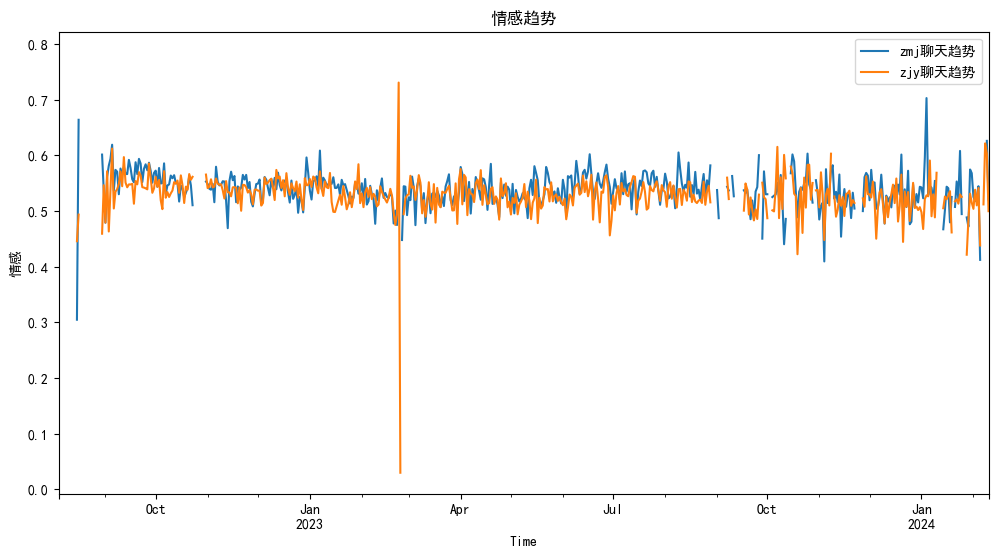

<Figure size 640x480 with 0 Axes>

In [224]:
plt.figure(figsize=(12, 6))
user1_daily_sentiment.plot(label='zmj聊天趋势')
user2_daily_sentiment.plot(label='zjy聊天趋势')
plt.ylabel('情感')
plt.title('情感趋势')
plt.legend()
plt.show()
plt.savefig(f'moodtrend', dpi=500)

C:\Users\25962\AppData\Local\Temp\ipykernel_3420\3343018868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmj_df['hourcount'] = 1
C:\Users\25962\AppData\Local\Temp\ipykernel_3420\3343018868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmj_df['hourzmj'] = zmj_df['Time'].map(lambda x:x.hour)


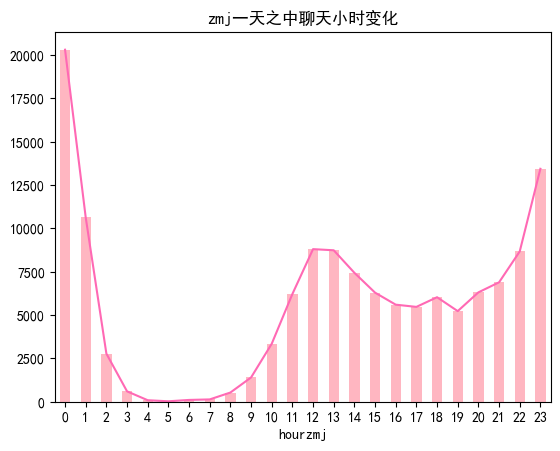

In [223]:
zmj_df = df[df['IsSender'] == 'zmj']

zmj_df['hourcount'] = 1
zmj_df['hourzmj'] = zmj_df['Time'].map(lambda x:x.hour)
group_by_hourzmj = zmj_df.groupby(by='hourzmj').count()['hourcount']
group_by_hourzmj.plot(kind='bar',color='lightpink')
group_by_hourzmj.plot(kind='line',color='hotpink')
plt.title('zmj一天之中聊天小时变化')
plt.savefig(f'zmjdaliytrend', dpi=500)

C:\Users\25962\AppData\Local\Temp\ipykernel_3420\947856284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zjy_df['hourcount'] = 1
C:\Users\25962\AppData\Local\Temp\ipykernel_3420\947856284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zjy_df['hourzjy'] = zjy_df['Time'].map(lambda x:x.hour)


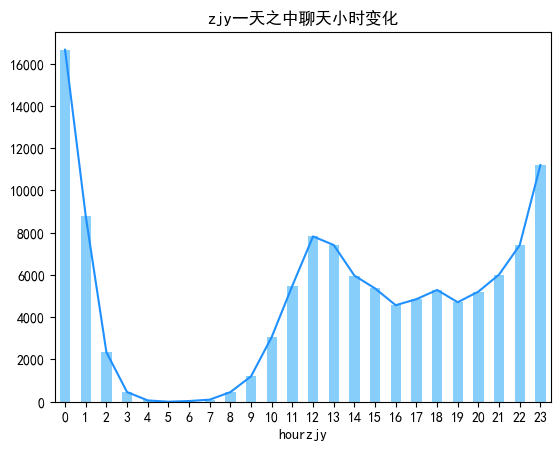

In [222]:
zjy_df = df[df['IsSender'] == 'zjy']

zjy_df['hourcount'] = 1
zjy_df['hourzjy'] = zjy_df['Time'].map(lambda x:x.hour)
group_by_hourzjy = zjy_df.groupby(by='hourzjy').count()['hourcount']
group_by_hourzjy.plot(kind='bar',color='lightskyblue')
group_by_hourzjy.plot(kind='line',color='dodgerblue')
plt.title('zjy一天之中聊天小时变化')
plt.savefig(f'zjydailytrend', dpi=500)

In [117]:
df_meme = pd.read_excel('meme.xlsx')
df_meme['Time'] = pd.to_datetime(df['StrTime'])
df_meme = df_meme.drop(['Status','Remark','NickName','Sender'],axis=1)
df_meme

,localId,TalkerId,Type,SubType,IsSender,CreateTime,StrContent,StrTime,Time
0,561195,1,47,0,zmj,1659614238,"<msg><emoji md5=""a69bc936aee46797d3ba41c92ca83...",2022-08-04 19:57:00,2022-08-04 19:29:00
1,561196,1,47,0,zjy,1659614587,"<msg><emoji fromusername=""wxid_brhbo15zeibz12""...",2022-08-04 20:03:00,2022-08-04 19:30:00
2,561220,1,47,0,zmj,1660623766,"<msg><emoji md5=""a69bc936aee46797d3ba41c92ca83...",2022-08-16 12:22:00,2022-08-04 19:30:00
3,561221,1,47,0,zjy,1660623781,"<msg><emoji fromusername=""wxid_brhbo15zeibz12""...",2022-08-16 12:23:00,2022-08-04 19:42:00
4,561234,1,47,0,zmj,1661661225,"<msg><emoji fromusername = ""wxid_c8aq7i938kh22...",2022-08-28 12:33:00,NaT
...,...,...,...,...,...,...,...,...,...
24025,561149,6,47,0,zmj,1707577891,"<msg><emoji fromusername = ""wxid_c8aq7i938kh22...",2024-02-10 23:11:00,2022-09-26 12:35:00
24026,561152,6,47,0,zjy,1707577932,"<msg><emoji fromusername=""wxid_brhbo15zeibz12""...",2024-02-10 23:12:00,2022-09-26 12:35:00
24027,561160,6,47,0,zmj,1707578207,"<msg><emoji fromusername = ""wxid_c8aq7i938kh22...",2024-02-10 23:16:00,2022-09-26 12:35:00
24028,561175,6,47,0,zmj,1707578533,"<msg><emoji fromusername = ""wxid_c8aq7i938kh22...",2024-02-10 23:22:00,2022-09-26 12:35:00


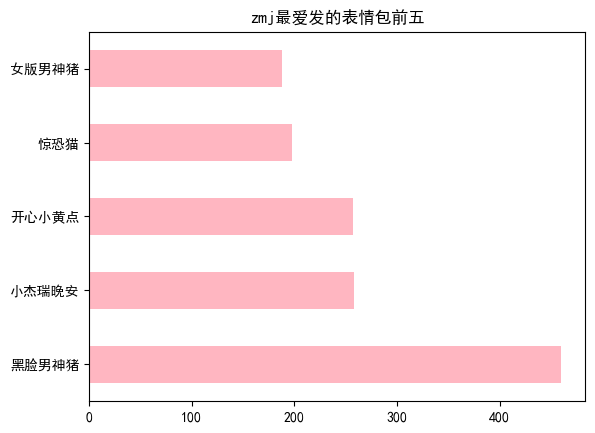

In [221]:
# 将数据按用户分开
zmj_meme = df_meme[df_meme['IsSender'] == 'zmj']
zjy_meme = df_meme[df_meme['IsSender'] == 'zjy']

zmj_meme_group = zmj_meme['StrContent'].value_counts()
zmj_meme_group.head(5).plot(kind='barh',color='lightpink')
plt.yticks([0,1,2,3,4],['黑脸男神猪','小杰瑞晚安','开心小黄点','惊恐猫','女版男神猪'])
plt.title('zmj最爱发的表情包前五')
plt.savefig(f'memezmjtop5', dpi=500)

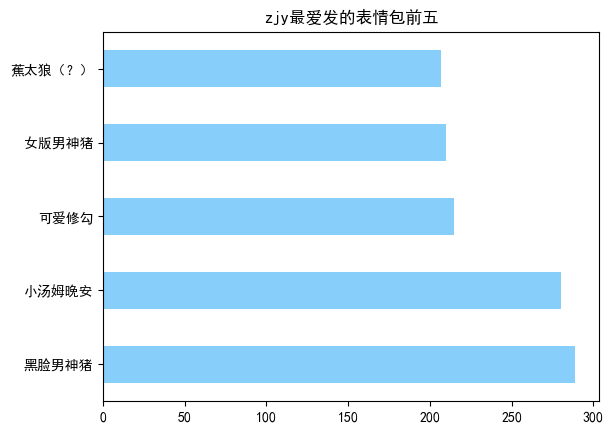

In [220]:
zjy_meme_group = zjy_meme['StrContent'].value_counts()
zjy_meme_group.head(5).plot(kind='barh',color='lightskyblue')
plt.yticks([0,1,2,3,4],['黑脸男神猪','小汤姆晚安','可爱修勾','女版男神猪','蕉太狼（？）'])
plt.title('zjy最爱发的表情包前五')
plt.savefig(f'memezjytop5', dpi=500)

In [165]:
zmj_meme['StrContent'].describe()

count                                                 15213
unique                                                 1793
top       <msg><emoji md5="82ae39646844221a03c6aefedbc0a...
freq                                                    460
Name: StrContent, dtype: object

In [164]:
zjy_meme['StrContent'].describe()

count                                                  8817
unique                                                  608
top       <msg><emoji fromusername="wxid_brhbo15zeibz12"...
freq                                                    289
Name: StrContent, dtype: object

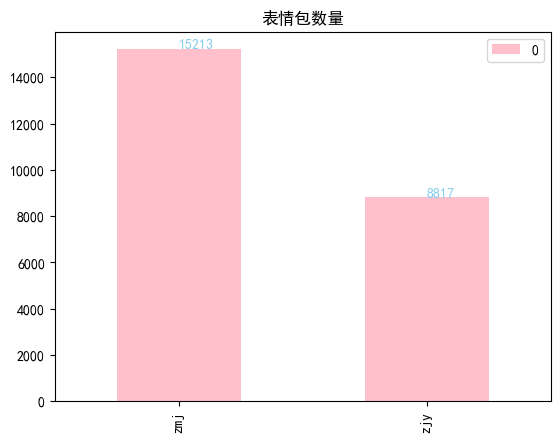

In [219]:
data = [15213,8817]
colors = ['pink','skyblue']
DataFrame(data).plot(kind='bar',color=colors)
plt.xticks([0,1],['zmj','zjy'])
plt.title('表情包数量')
plt.text(0,15230,15213,color='skyblue')
plt.text(1,8825,8817,color='skyblue')
plt.savefig(f'memecount', dpi=500)

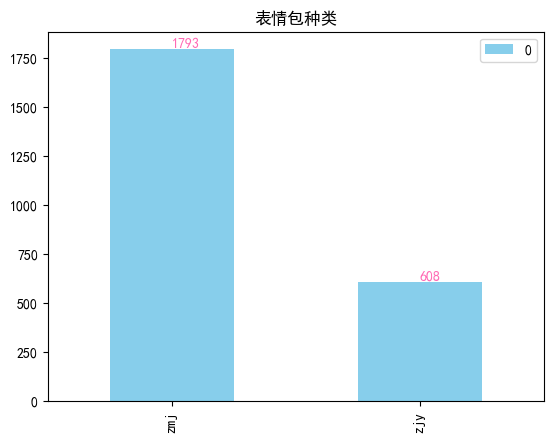

In [218]:
data = [1793,608]

colors = ['skyblue']
DataFrame(data).plot(kind='bar',color=colors)
plt.xticks([0,1],['zmj','zjy'])
plt.title('表情包种类')
plt.text(0,1800,1793,color='hotpink')
plt.text(1,620,608,color='hotpink')
plt.savefig(f'memetype', dpi=500)

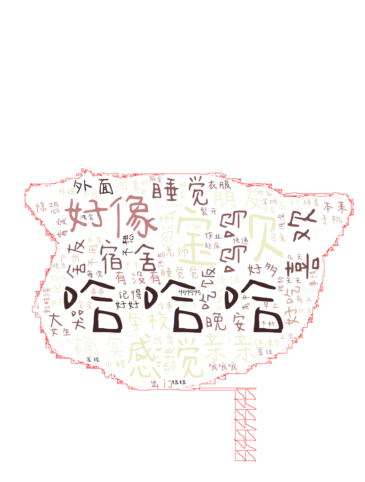

In [209]:
import pandas as pd
import jieba
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from PIL import Image
import numpy as np


top_words_zmj = dict(word_freq_zmj.most_common(100))

font_path = 'ziti1.ttf'

fontprop = fm.FontProperties(fname=font_path)


mask = np.array(Image.open('littlecat.png'))

wordcloud = WordCloud(width=800, height=600, background_color='white', mask=mask,font_path=font_path,
                          collocations=True, colormap='pink', contour_color='red',
                          contour_width=0.0001).generate_from_frequencies(top_words_zmj)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(f'wordcloud_user_.png', dpi=500)  # 保存词云图像 with higher DPI
plt.show()



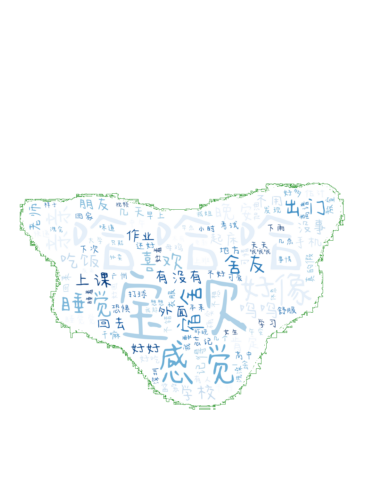

In [211]:
top_words_zjy = dict(word_freq_zjy.most_common(100))

font_path = 'ziti1.ttf'

fontprop = fm.FontProperties(fname=font_path)


mask = np.array(Image.open('littledog.png'))

wordcloud = WordCloud(width=800, height=600, background_color='white', mask=mask,font_path=font_path,
                          collocations=True, colormap='Blues', contour_color='green',
                          contour_width=0.0001).generate_from_frequencies(top_words_zjy)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(f'wordcloud_zjy2', dpi=500)  # 保存词云图像 with higher DPI
plt.show()


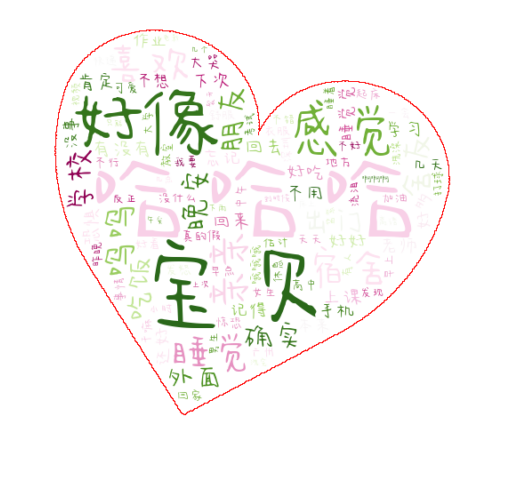

In [217]:
from pandas.core.frame import DataFrame

content = df[(df['Type'] == 1)]['StrContent']
output_file_path = r"C:\Users\25962\datajy\content.txt"
content.to_csv(output_file_path,index=False,header=False,sep='\t')

with open(r"C:\Users\25962\datajy\content.txt","r",encoding='utf-8') as file:
    text = file.read()
 
import re
import jieba

cleaned_text = re.sub(r'[^\u4e00-\u9fa5]','',text)
words = jieba.cut(cleaned_text)

stop_words = set()
with open(r"C:\Users\25962\datajy\stopwords_cn.txt","r",encoding='utf-8') as stop_words_file:
    stop_words = set(stop_words_file.read().splitlines())
filtered_words = [word for word in words if word not in stop_words and len(word)>1]

from collections import Counter
word_freq_all = Counter(filtered_words)
most_common_words=word_freq_all.most_common(20)
most_common_words_df = DataFrame(most_common_words)

top_words_all = dict(word_freq_all.most_common(100))

font_path = 'ziti1.ttf'

fontprop = fm.FontProperties(fname=font_path)


mask = np.array(Image.open('shape.png'))

wordcloud = WordCloud(width=800, height=600, background_color='white', mask=mask,font_path=font_path,
                          collocations=True, colormap='PiYG', contour_color='red',
                          contour_width=0.0001).generate_from_frequencies(top_words_all)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(f'wordcloud_all2', dpi=500)  # 保存词云图像 with higher DPI
plt.show()


In [4]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
font = './chinese.stxingka.ttf'
strcontent = str(df['StrContent'])
stopwords = ['的','哈','我','嗯','了','哦','是','好的','那种','真的','有人']
wc = WordCloud(font_path=font,background_color = 'white',width=1000,height=700,stopwords=stopwords)
wc = wc.generate(' '.join(df['StrContent']))
plt.imshow(wc)
plt.axis('off')
plt.show()


TypeError: sequence item 53: expected str instance, float found